In [20]:
import pandas as pd 
import numpy as np ##for statistical models
import matplotlib.pyplot as plt ##for plots
from sklearn.model_selection import train_test_split ##for spliting data
from sklearn import datasets, linear_model, metrics ##for linear regression model
import statsmodels.api as sm ##for ols
df = pd.read_csv(r'C:\Users\Admin\OneDrive - National University of Sciences & Technology\Desktop\Breast Cancer\BreastTissue.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

     Case  Class           I0     PA500       HFS           DA           Area  \
0        1   car   524.794072  0.187448  0.032114   228.800228    6843.598481   
1        2   car   330.000000  0.226893  0.265290   121.154201    3163.239472   
2        3   car   551.879287  0.232478  0.063530   264.804935   11888.391830   
3        4   car   380.000000  0.240855  0.286234   137.640111    5402.171180   
4        5   car   362.831266  0.200713  0.244346   124.912559    3290.462446   
..     ...   ...          ...       ...       ...          ...            ...   
101    102   adi  2000.000000  0.106989  0.105418   520.222649   40087.920980   
102    103   adi  2600.000000  0.200538  0.208043  1063.441427  174480.476200   
103    104   adi  1600.000000  0.071908 -0.066323   436.943603   12655.342130   
104    105   adi  2300.000000  0.045029  0.136834   185.446044    5086.292497   
105    106   adi  2600.000000  0.069988  0.048869   745.474369   39845.773700   

           A/DA      Max IP

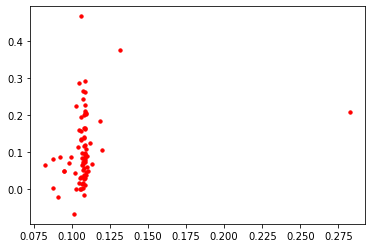

In [21]:
features = ['DA', 'Area'] ##Create list of all independent variables from your data set
X = df.loc[:, features] ### Sub-data consisting all X variables
X = sm.add_constant(X)
y = df.loc[:, ['HFS']]##Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
random_state=0, train_size = .75)##Spliting data into training and testing
reg = linear_model.LinearRegression() ##Runing a regression model using using linear_model package  
# train the model using the training sets
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_train)
# Print out the summary statistics
model.summary()
plt.scatter(model.predict(X_train), y_train, color = "red", s = 11, label = 'Scatter Plot')

In [22]:
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_train)
predictions_test= model.predict(X_test)
model.summary()
#predictions_test

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HFS   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.983
Date:                Thu, 06 Oct 2022   Prob (F-statistic):              0.145
Time:                        04:29:34   Log-Likelihood:                 77.305
No. Observations:                  79   AIC:                            -148.6
Df Residuals:                      76   BIC:                            -141.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1101      0.015      7.201      0.000       0.080       0.141
DA         -5.842e-05   7.71e-05     -0.758      0.451      -0.000    9.51e-05
Area        1.344e-06   7.27e-07      1.848      0.068   -1.04e-07    2.79e-06
==============================================================================
Omnibus:                       23.618   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.409
Skew:                           1.238   Prob(JB):                     2.05e-08
Kurtosis:                       5.151   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""